# Spam Classification

## Importing Required Libraries

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [5]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Creating Text Representations
Text data needs to be converted to numeric representations before they can be used to train deep learning models. The Spam classification feature data is converted to TF-IDF vectors and the target variable is converted to one-hot encoding.

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [7]:
# Load spam data and review content
spam_data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Spam-Classification.csv')
spam_data.head()

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


In [8]:
# Separate feature and target data
spam_classes_raw = spam_data['CLASS']
spam_messages = spam_data['SMS']

In [9]:
import nltk
import tensorflow as tf

# Custom tokenizer to remove stopwords and lemmatize words
def customtokenize(str):
  # Split string as tokens
  tokens = nltk.word_tokenize(str)

  # Filter for stopwords
  nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))

  # Perform lemmatization
  lemmatized = [lemmatizer.lemmatize(word) for word in nostop]
  return lemmatized

In [10]:
# Build a TF-IDF vectorizer model
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=customtokenize)

# Transform feature input into TF-IDF vectors
tfidf = vectorizer.fit_transform(spam_messages)

# Convert TF-IDF vectors to numpy array
tfidf_array = tfidf.toarray()

print("TF-IDF Matrix Shape: ", tfidf_array.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix Shape:  (1500, 4568)


In [11]:
# Build a label encoder for target variable to convert strings to numeric values
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)

# Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes, 2)

print("One-hot Encoding Shape: ", spam_classes.shape)

One-hot Encoding Shape:  (1500, 2)


In [12]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_array, spam_classes, test_size=0.10)

## Building and Evaluating the model

In [13]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Setup hyperparameters for building the model
NB_CLASSES = 2
N_HIDDEN = 32

model = keras.models.Sequential()

In [15]:
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(X_train.shape[1],),
                             name='Hidden-Layer-1',
                             activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                             name='Hidden-Layer-2',
                             activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 32)                  │         146,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,330 (575.51 KB)

 Trainable params: 147,330 (575.51 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Make it verbose so we can see the progress
VERBOSE = 1

# Setup hyperparameters for training
BATCH_SIZE = 256
EPOCHS = 10
VALIDATION_SPLIT = 0.2

Training Progress:

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.5717 - loss: 0.6915 - val_accuracy: 0.7889 - val_loss: 0.6845
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8374 - loss: 0.6785 - val_accuracy: 0.8815 - val_loss: 0.6689
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9404 - loss: 0.6555 - val_accuracy: 0.9185 - val_loss: 0.6407
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9582 - loss: 0.6193 - val_accuracy: 0.9259 - val_loss: 0.6064
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9512 - loss: 0.5771 - val_accuracy: 0.9519 - val_loss: 0.5685
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9746 - loss: 0.5281 - val_accuracy: 0.9519 - val_loss: 0.5283
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9774 - loss: 0.4787 - val_accuracy: 0.9556 - val_loss: 0.4868
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9808 - loss: 0.4277 - val_accuracy: 0.955

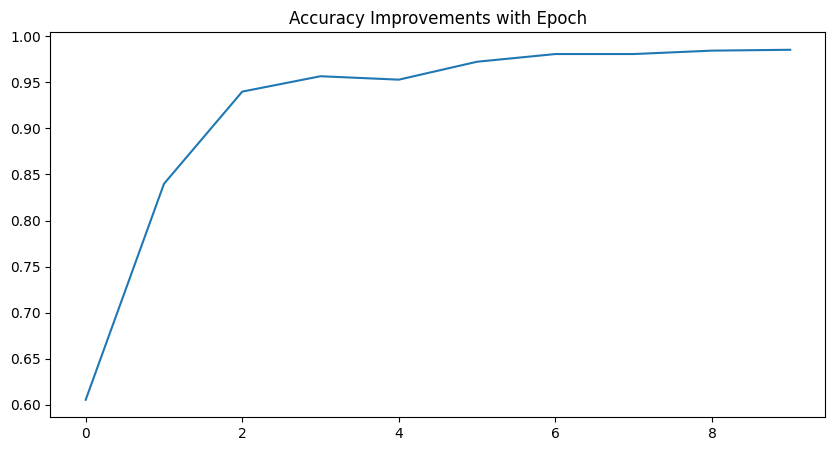

In [17]:
print("Training Progress:\n")

history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT)

print("Accuracy during training:\n")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)['accuracy'].plot(figsize=(10,5))
plt.title('Accuracy Improvements with Epoch')
plt.show()

In [18]:
print("Evaluation against test dataset: \n")
model.evaluate(X_test, y_test)

Evaluation against test dataset: 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9336 - loss: 0.3806 


[0.37192589044570923, 0.9466666579246521]

## Predicting for Text

In [19]:
#Predict for multiple samples using batch processing

#Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf=vectorizer.transform(["FREE entry to a fun contest",
                                    "Yup I will come over"]).toarray()

print(predict_tfidf.shape)

(2, 4568)


In [20]:
#Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediction Output: [1 0]
Prediction Classes are  ['spam' 'ham']
